In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

%matplotlib inline

### https://www.baseball-reference.com/

Currently pulling all of 2017 to present day

tb_away --> Team Finder, Game, Batting --> Sort by 'Date of Game', Visiting team <br/>
tb_home --> Team Finder, Game, Batting --> Sort by 'Date of Game', Home team <br/>
https://www.baseball-reference.com/play-index/game_finder.cgi?class=team&type=b

tp_away --> Team Finder, Game, Pitching --> Sort by 'Date of Game', Visiting team <br/>
tp_home --> Team Finder, Game, Pitching --> Sort by 'Date of Game', Home team <br/>
https://www.baseball-reference.com/play-index/game_finder.cgi?class=team&type=p

pp_L --> Player Finder, Game, Pitching --> Sort by 'Date of Game', Left-Handed, STARTING PITCHERS ONLY: <br/>
pp_R --> Player Finder, Game, Pitching --> Sort by 'Date of Game', Right-Handed, STARTING PITCHERS ONLY: <br/>
https://www.baseball-reference.com/play-index/game_finder.cgi?type=p

To do:
- Possibly One-hot Encode Stadiums
- One-hot Encode Weather metrics
- Include ADI metrics

In [2]:
# Read in the data
tb_away = pd.read_csv('../data/team_batting_away_2018-05-14.csv')
tb_home = pd.read_csv('../data/team_batting_home_2018-05-14.csv')

tp_away = pd.read_csv('../data/team_pitching_away_2018-05-14.csv')
tp_home = pd.read_csv('../data/team_pitching_home_2018-05-14.csv')

pp_L = pd.read_csv('../data/player_pitching_L_2018-05-14.csv') 
pp_R = pd.read_csv('../data/player_pitching_R_2018-05-14.csv')

In [3]:
# Assure that shapes are as expected
print(tb_away.shape)
print(tb_home.shape)

print(tp_away.shape)
print(tp_home.shape)

print(pp_L.shape)
print(pp_R.shape)

(2909, 35)
(2909, 35)
(2909, 43)
(2909, 43)
(1573, 45)
(4245, 45)


In [4]:
# Make sure min/max dates match
print(tb_away['Date'].min())
print(tb_home['Date'].min())
print(tp_away['Date'].min())
print(tp_home['Date'].min())
print(pp_L['Date'].min())
print(pp_R['Date'].min())

print('\n')

print(tb_away['Date'].max())
print(tb_home['Date'].max())
print(tp_away['Date'].max())
print(tp_home['Date'].max())
print(pp_L['Date'].max())
print(pp_R['Date'].max())

2017-04-02
2017-04-02
2017-04-02
2017-04-02
2017-04-02
2017-04-02


2018-05-14
2018-05-14
2018-05-14
2018-05-14
2018-05-14
2018-05-14


In [5]:
# One-hot encode features not explicitly listed
tb_away['Home?'] = 0
tb_home['Home?'] = 1

tp_away['Home?'] = 0
tp_home['Home?'] = 1

pp_L['RH?'] = 0
pp_R['RH?'] = 1

In [6]:
# Collapse into combined dataframes
tb = pd.concat([tb_away, tb_home])
tp = pd.concat([tp_away, tp_home])
pp = pd.concat([pp_L, pp_R])

In [7]:
# Reset indices, and drop erroneous 'Rk'
tb.reset_index(drop=True, inplace=True)
tp.reset_index(drop=True, inplace=True)
pp.reset_index(drop=True, inplace=True)

tb.drop('Rk', axis=1, inplace=True)
tp.drop('Rk', axis=1, inplace=True)
pp.drop('Rk', axis=1, inplace=True)

## Create Stadium DataFrame

In [87]:
# https://www.fangraphs.com/community/complete-outfield-dimensions/
stad_df = pd.read_csv('../data/power_alleys.tsv', sep='\t')

In [88]:
# New Stadium for ATL, dimensions unknown, but we will leave them for now
stad_df.set_value(1, 'Stadium', 'SunTrust Park')
#stad_df.set_value(1, 'OF', np.nan)
#stad_df.set_value(1, 'LF', np.nan)
#stad_df.set_value(1, 'CF', np.nan)
#stad_df.set_value(1, 'RF', np.nan)

# Stadium for CHW only renamed, dimensions the same
stad_df.set_value(5, 'Stadium', 'Guaranteed Rate Field')

,City,Team,Stadium,OF,LF,CF,RF
0,Arizona,Diamondbacks,Chase Field,94.1,28.7,36.2,29.2
1,Atlanta,Braves,SunTrust Park,94.1,29.2,35.3,29.6
2,Baltimore,Orioles,Oriole Park at Camden Yards,87.8,27.1,34.4,26.3
3,Boston,Red Sox,Fenway Park,83.5,21.1,32.8,29.6
4,Chicago,Cubs,Wrigley Field,89.7,26.8,34.1,28.8
5,Chicago,White Sox,Guaranteed Rate Field,87.8,26.5,34.2,27.2
6,Cincinnati,Reds,Great American Ball Park,87.1,26.7,34.5,26.0
7,Cleveland,Indians,Progressive Field,85.6,25.8,33.2,26.6
8,Colorado,Rockies,Coors Field,97.3,30.2,38.3,28.8
9,Detroit,Tigers,Comerica Park,95.8,28.5,39.9,27.4


In [89]:
stad_df['Abbrev'] = ['ARI', 'ATL', 'BAL', 'BOS', 'CHC', 'CHW', 'CIN', 'CLE', 'COL', 'DET',
                      'HOU', 'KCR', 'LAA', 'LAD', 'MIA', 'MIL', 'MIN', 'NYM', 'NYY', 'OAK',
                      'PHI', 'PIT', 'SDP', 'SFG', 'SEA', 'STL', 'TBR', 'TEX', 'TOR', 'WSN']

In [90]:
# Elevation, Distance to LF, Distance to CF, Distance to RF
# Elevations: http://baseballjudgments.tripod.com/id62.html
# Distance: http://www.andrewclem.com/Baseball/Overlay_comparison.php
stadium_dims = {
    'ARI': [1082, 330, 407, 335],
    'ATL': [1050, 335, 400, 330],
    'BAL': [130, 333, 410, 318],
    'BOS': [20, 310, 390, 302],
    'CHC': [596, 355, 400, 353],
    'CHW': [596, 330, 400, 335],
    'CIN': [683, 328, 404, 325],
    'CLE': [582, 325, 400, 325],
    'COL': [5183, 347, 415, 350],
    'DET': [596, 345, 420, 330],
    'HOU': [38, 315, 409, 326],
    'KCR': [750, 330, 410, 330], 
    'LAA': [160, 347, 396, 350],
    'LAD': [267, 330, 395, 330],
    'MIA': [15, 344, 407, 335],
    'MIL': [593, 344, 400, 345],
    'MIN': [812, 339, 411, 328],
    'NYM': [54, 335, 408, 330],
    'NYY': [54, 318, 408, 314],
    'OAK': [42, 330, 400, 330],
    'PHI': [9, 334, 401, 330],
    'PIT': [743, 325, 399, 320],
    'STL': [455, 336, 400, 335],
    'SDP': [13, 336, 396, 322],
    'SFG': [63, 339, 399, 309],
    'SEA': [10, 331, 401, 326],
    'TBR': [44, 315, 404, 322],
    'TEX': [616, 332, 404, 326],
    'TOR': [247, 328, 400, 328],
    'WSN': [25, 336, 402, 335]
}

In [91]:
elev_list = []
lf_list = []
cf_list = []
rf_list = []
for i in stad_df.index:
    elev_list.append(stadium_dims[stad_df.loc[i]['Abbrev']][0])
    lf_list.append(stadium_dims[stad_df.loc[i]['Abbrev']][1])
    cf_list.append(stadium_dims[stad_df.loc[i]['Abbrev']][2])
    rf_list.append(stadium_dims[stad_df.loc[i]['Abbrev']][3])
stad_df['Elev'] = elev_list
stad_df['Dist_LF'] = lf_list
stad_df['Dist_CF'] = cf_list
stad_df['Dist_RF'] = rf_list

In [92]:
stad_df

,City,Team,Stadium,OF,LF,CF,RF,Abbrev,Elev,Dist_LF,Dist_CF,Dist_RF
0,Arizona,Diamondbacks,Chase Field,94.1,28.7,36.2,29.2,ARI,1082,330,407,335
1,Atlanta,Braves,SunTrust Park,94.1,29.2,35.3,29.6,ATL,1050,335,400,330
2,Baltimore,Orioles,Oriole Park at Camden Yards,87.8,27.1,34.4,26.3,BAL,130,333,410,318
3,Boston,Red Sox,Fenway Park,83.5,21.1,32.8,29.6,BOS,20,310,390,302
4,Chicago,Cubs,Wrigley Field,89.7,26.8,34.1,28.8,CHC,596,355,400,353
5,Chicago,White Sox,Guaranteed Rate Field,87.8,26.5,34.2,27.2,CHW,596,330,400,335
6,Cincinnati,Reds,Great American Ball Park,87.1,26.7,34.5,26.0,CIN,683,328,404,325
7,Cleveland,Indians,Progressive Field,85.6,25.8,33.2,26.6,CLE,582,325,400,325
8,Colorado,Rockies,Coors Field,97.3,30.2,38.3,28.8,COL,5183,347,415,350
9,Detroit,Tigers,Comerica Park,95.8,28.5,39.9,27.4,DET,596,345,420,330


In [93]:
print(stad_df['OF'].min())
print(stad_df['OF'].max())
print(stad_df['OF'].max()-stad_df['OF'].min())

83.5
97.9
14.400000000000006


In [94]:
# Difference equivalent to a 120' x 120' = 14,400 ft^2
# Difference equivalent to 40 yds x 40 yds (Football field is 53-1/3 yds wide)

In [95]:
stad_df.set_index('Stadium', drop=False, inplace=True)

## End of Stadium DataFrame

In [96]:
# Make Stadium dictionary so we can append to tb
stadiums = {}
for i in stad_df.index:
    stadiums[stad_df.loc[i]['Abbrev']] = stad_df.loc[i]['Stadium']

In [97]:
stadiums

{'ARI': 'Chase Field',
 'ATL': 'SunTrust Park',
 'BAL': 'Oriole Park at Camden Yards',
 'BOS': 'Fenway Park',
 'CHC': 'Wrigley Field',
 'CHW': 'Guaranteed Rate Field',
 'CIN': 'Great American Ball Park',
 'CLE': 'Progressive Field',
 'COL': 'Coors Field',
 'DET': 'Comerica Park',
 'HOU': 'Minute Maid Park',
 'KCR': 'Kauffman Stadium',
 'LAA': 'Angel Stadium',
 'LAD': 'Dodger Stadium',
 'MIA': 'Marlins Park',
 'MIL': 'Miller Park',
 'MIN': 'Target Field',
 'NYM': 'Citi Field',
 'NYY': 'Yankee Stadium',
 'OAK': 'O.co Coliseum',
 'PHI': 'Citizens Bank Park',
 'PIT': 'PNC Park',
 'SDP': 'PETCO Park',
 'SEA': 'Safeco Field',
 'SFG': 'AT&T Park',
 'STL': 'Busch Stadium',
 'TBR': 'Tropicana Field',
 'TEX': 'Globe Life Park in Arlington',
 'TOR': 'Rogers Centre',
 'WSN': 'Nationals Park'}

In [98]:
# Assign stadium in 'tb', we will build up from there
stad_list = []
for i in tb.index:
    if tb.loc[i]['Home?'] == 1:
        stad_list.append(stadiums[tb.loc[i]['Tm']])
    else:
        stad_list.append(stadiums[tb.loc[i]['Opp']])
        
tb['Stad'] = stad_list

In [99]:
# Extract Doubleheader information from date, and make its own feature
tb['Game#'] = tb['Date'].apply(lambda x: int(x[-2]) if x[-1]==')' else 1)
tp['Game#'] = tp['Date'].apply(lambda x: int(x[-2]) if x[-1]==')' else 1)
pp['Game#'] = pp['Date'].apply(lambda x: int(x[-2]) if x[-1]==')' else 1)

TypeError: 'Timestamp' object does not support indexing

In [ ]:
# Remove Doubleheader information from date
tb['Date'] = tb['Date'].apply(lambda x: x[:10])
tp['Date'] = tp['Date'].apply(lambda x: x[:10])
pp['Date'] = pp['Date'].apply(lambda x: x[:10])

In [ ]:
# Make Date a datetime type
tb['Date'] = pd.to_datetime(tb['Date'])
tp['Date'] = pd.to_datetime(tp['Date'])
pp['Date'] = pd.to_datetime(pp['Date'])

In [ ]:
# Extract Win/Loss information from 'Rslt', and make its own feature
tb['Win/Loss'] = tb['Rslt'].apply(lambda x: 1 if x[0]=='W' else 0)
tp['Win/Loss'] = tp['Rslt'].apply(lambda x: 1 if x[0]=='W' else 0)
pp['Win/Loss'] = pp['Rslt'].apply(lambda x: 1 if x[0]=='W' else 0)

In [ ]:
# Create Strikes-per-pitch, possible indicator of pitcher strength
tp['Str/Pit'] = tp['Str'] / tp['Pit']
pp['Str/Pit'] = pp['Str'] / pp['Pit']

In [ ]:
# Create BattersFaced-per-inning-pitched, better pitches will face fewer batters
tp['BF/IP'] = tp['BF'] / tp['IP']
pp['BF/IP'] = pp['BF'] / pp['IP']

In [ ]:
# Let's Drop the 2nd game of doubleheaders to simplify 
tb = tb[tb['Game#'].apply(lambda x: True if x==1 else False)]
tp = tp[tp['Game#'].apply(lambda x: True if x==1 else False)]
pp = pp[pp['Game#'].apply(lambda x: True if x==1 else False)]

In [100]:
print(tb.shape)
print(tp.shape)
print(pp.shape)

(5744, 41)
(5744, 47)
(5744, 49)


## Handling Null Values

In [101]:
# Assign 'WindDir' as 'none' wherever 'WindSpd' = 0
new_WindDir = []
for i in tb.index:
    if tb.loc[i]['WindSpd'] == 0:
        new_WindDir.append('none')
    else:
        new_WindDir.append(tb.loc[i]['WindDir'])
tb['WindDir'] = new_WindDir

#------------------------------

new_WindDir = []
for i in tp.index:
    if tp.loc[i]['WindSpd'] == 0:
        new_WindDir.append('none')
    else:
        new_WindDir.append(tp.loc[i]['WindDir'])
tp['WindDir'] = new_WindDir   

#-------------------------------

new_WindDir = []
for i in pp.index:
    if pp.loc[i]['WindSpd'] == 0:
        new_WindDir.append('none')
    else:
        new_WindDir.append(pp.loc[i]['WindDir'])
pp['WindDir'] = new_WindDir   

In [102]:
tb.isnull().sum()

Date                0
Tm                  0
Opp                 0
Rslt                0
PA                  0
AB                  0
R                   0
H                   0
2B                  0
3B                  0
HR                  0
RBI                 0
BB                  0
IBB                 0
SO                  0
HBP                 0
SH                  0
SF                  0
ROE                 0
GDP                 0
SB                  0
CS                  0
WPA                 2
RE24                2
aLI                 2
LOB                 0
#                   0
Attendance         30
GmLen               0
Temp                0
WindDir           220
WindSpd             0
Prec                0
Sky               786
Home?               0
Stad                0
Game#               0
Win/Loss            0
Static_bat_avg      0
Expected_Hits       0
Hit+/-              0
dtype: int64

### Notes
- A lot of missing 'Precipitation' data. We might set these to 'none' until we can incorporate from another source
- Okay to drop balance of 'WindDir' nulls
- Not sure yet how to handle 'Sky'

In [103]:
tb['WindDir'].unique()

array(['ltor', 'rtol', 'none', 'tolf', 'fromrf', 'tocf', 'fromlf', 'torf',
       nan, 'fromcf'], dtype=object)

In [104]:
tb['Prec'].unique()

array(['none', 'rain', 'drizzle', 'snow'], dtype=object)

In [105]:
tb['Sky'].unique()

array(['sunny', nan, 'dome', 'cloudy', 'overcast', 'night'], dtype=object)

#### May come back to find better handle of missing 'Prec' and 'Sky'

In [106]:
# Assign 'Prec' nulls as 'none'
new_Prec = []
for i in tb.index:
    if pd.isnull(tb.loc[i]['Prec']):
        new_Prec.append('none')
    else:
        new_Prec.append(tb.loc[i]['Prec'])
tb['Prec'] = new_Prec
        
#------------------------------
    
new_Prec = []
for i in tp.index:
    if pd.isnull(tp.loc[i]['Prec']):
        new_Prec.append('none')
    else:
        new_Prec.append(tp.loc[i]['Prec'])
tp['Prec'] = new_Prec

#------------------------------
        
new_Prec = []
for i in pp.index:
    if pd.isnull(pp.loc[i]['Prec']):
        new_Prec.append('none')
    else:
        new_Prec.append(pp.loc[i]['Prec'])
pp['Prec'] = new_Prec

In [107]:
tb.isnull().sum()

Date                0
Tm                  0
Opp                 0
Rslt                0
PA                  0
AB                  0
R                   0
H                   0
2B                  0
3B                  0
HR                  0
RBI                 0
BB                  0
IBB                 0
SO                  0
HBP                 0
SH                  0
SF                  0
ROE                 0
GDP                 0
SB                  0
CS                  0
WPA                 2
RE24                2
aLI                 2
LOB                 0
#                   0
Attendance         30
GmLen               0
Temp                0
WindDir           220
WindSpd             0
Prec                0
Sky               786
Home?               0
Stad                0
Game#               0
Win/Loss            0
Static_bat_avg      0
Expected_Hits       0
Hit+/-              0
dtype: int64

In [108]:
# We will drop 'Sky' nulls at Modeling step

## Sort DataFrames

In [109]:
# Sort team df's on Date, and then Team
tb.sort_values(['Date', 'Tm'], inplace=True)
tp.sort_values(['Date', 'Tm'], inplace=True)
pp.sort_values(['Date', 'Player'], inplace=True)

tb.reset_index(drop=True, inplace=True)
tp.reset_index(drop=True, inplace=True)
pp.reset_index(drop=True, inplace=True)

## Exploration

In [110]:
# Batting average across all teams
all_bat_avg = tb['H'].sum() / tb['AB'].sum()
all_bat_avg

0.2540622720153461

In [111]:
# Determine batting average and mean temp within each stadium
stad_bat_avg = pd.DataFrame(index=stadiums.values(), columns=['Avg.', 'Mean_Temp'])
for stadium in stadiums.values():
    stad_tb = tb[tb['Stad']==stadium]
    
    num_hits = stad_tb['H'].sum()
    num_AB = stad_tb['AB'].sum()
    avg = num_hits / num_AB
    
    mean_temp = stad_tb['Temp'].mean()
    
    stad_bat_avg.loc[stadium]['Avg.'] = avg
    stad_bat_avg.loc[stadium]['Mean_Temp'] = mean_temp

In [112]:
# Sort by Average and reset index
stad_bat_avg.sort_values('Avg.', inplace=True, ascending=False)

stad_bat_avg.reset_index(inplace=True)
stad_bat_avg.columns = ['Stadium', 'Avg.', 'Mean_Temp']
stad_bat_avg.set_index('Stadium', drop=False, inplace=True)

stad_bat_avg.head()

,Stadium,Avg.,Mean_Temp
Stadium,,,
Coors Field,Coors Field,0.282974,72
Comerica Park,Comerica Park,0.27603,68.6771
Target Field,Target Field,0.267868,67.8913
SunTrust Park,SunTrust Park,0.264009,76.1277
Fenway Park,Fenway Park,0.263498,66.1042


In [113]:
# Bring in additional stadium information
stad_merged = stad_bat_avg.merge(stad_df, how='left')

In [114]:
# OF/LF/CF/RF is x1000ft^2 of field area
stad_merged.head()

,Stadium,Avg.,Mean_Temp,City,Team,OF,LF,CF,RF,Abbrev,Elev,Dist_LF,Dist_CF,Dist_RF
0,Coors Field,0.282974,72,Colorado,Rockies,97.3,30.2,38.3,28.8,COL,5183,347,415,350
1,Comerica Park,0.27603,68.6771,Detroit,Tigers,95.8,28.5,39.9,27.4,DET,596,345,420,330
2,Target Field,0.267868,67.8913,Minnesota,Twins,90.4,28.0,35.8,26.6,MIN,812,339,411,328
3,SunTrust Park,0.264009,76.1277,Atlanta,Braves,94.1,29.2,35.3,29.6,ATL,1050,335,400,330
4,Fenway Park,0.263498,66.1042,Boston,Red Sox,83.5,21.1,32.8,29.6,BOS,20,310,390,302


In [115]:
# Make dictionary of each Team and their Batting Average
teams = stad_merged['Abbrev'].unique()
team_bat_avg = {}
for team in teams:
    team_df = tb[tb['Tm']==team]
    avg = team_df['H'].sum() / team_df['AB'].sum()
    team_bat_avg[team] = avg

In [116]:
# Add static batting average to tb, and generate some additional features 
bat_avg_list = []
for i in tb.index:
    bat_avg_list.append(team_bat_avg[tb.loc[i]['Tm']])
tb['Static_bat_avg'] = bat_avg_list

expect_list = []
for i in tb.index:
    expect_list.append(tb.loc[i]['Static_bat_avg'] * tb.loc[i]['AB'])
tb['Expected_Hits'] = expect_list

hit_dif_list = []
for i in tb.index:
    hit_dif_list.append(tb.loc[i]['H'] - tb.loc[i]['Expected_Hits'])
tb['Hit+/-'] = hit_dif_list

In [117]:
# Make dictionary of each Stadium and the +/- of Expected Hits
stadium_hits = {}
for stadium in stadiums.values():
    stad_tb = tb[tb['Stad']==stadium]
    
    over_under_hits = stad_tb['Hit+/-'].sum()
    
    stadium_hits[stadium] = over_under_hits

In [118]:
stadium_hits

{'AT&T Park': 21.86845517299979,
 'Angel Stadium': -52.26091184595122,
 'Busch Stadium': -28.07377582823753,
 'Chase Field': 15.42252524761182,
 'Citi Field': -26.763906367692634,
 'Citizens Bank Park': -2.993084333353517,
 'Comerica Park': 125.2368432912036,
 'Coors Field': 160.55548107109757,
 'Dodger Stadium': -112.65456831479207,
 'Fenway Park': 46.62535948008603,
 'Globe Life Park in Arlington': 93.6301549105804,
 'Great American Ball Park': -19.59620896642099,
 'Guaranteed Rate Field': -45.75110953784024,
 'Kauffman Stadium': 30.599194526416532,
 'Marlins Park': -15.938466213060732,
 'Miller Park': 7.023643748762631,
 'Minute Maid Park': -84.10883670388988,
 'Nationals Park': -7.913701985245368,
 'O.co Coliseum': 7.805720971368865,
 'Oriole Park at Camden Yards': 60.35549246349634,
 'PETCO Park': -36.81023222308865,
 'PNC Park': 43.387555371032704,
 'Progressive Field': -40.10487042297841,
 'Rogers Centre': 22.050004698978718,
 'Safeco Field': -34.69934017827043,
 'SunTrust Park'

In [119]:
# Append Hit_diff From Expected feature to stad_merged
hitdiff_list = []
for i in stad_merged.index:
    hitdiff_list.append(stadium_hits[stad_merged.loc[i]['Stadium']])
stad_merged['Hit_Diff'] = hitdiff_list

In [120]:
stad_merged.head()

,Stadium,Avg.,Mean_Temp,City,Team,OF,LF,CF,RF,Abbrev,Elev,Dist_LF,Dist_CF,Dist_RF,Hit_Diff
0,Coors Field,0.282974,72,Colorado,Rockies,97.3,30.2,38.3,28.8,COL,5183,347,415,350,160.555481
1,Comerica Park,0.27603,68.6771,Detroit,Tigers,95.8,28.5,39.9,27.4,DET,596,345,420,330,125.236843
2,Target Field,0.267868,67.8913,Minnesota,Twins,90.4,28.0,35.8,26.6,MIN,812,339,411,328,79.543805
3,SunTrust Park,0.264009,76.1277,Atlanta,Braves,94.1,29.2,35.3,29.6,ATL,1050,335,400,330,35.443585
4,Fenway Park,0.263498,66.1042,Boston,Red Sox,83.5,21.1,32.8,29.6,BOS,20,310,390,302,46.625359


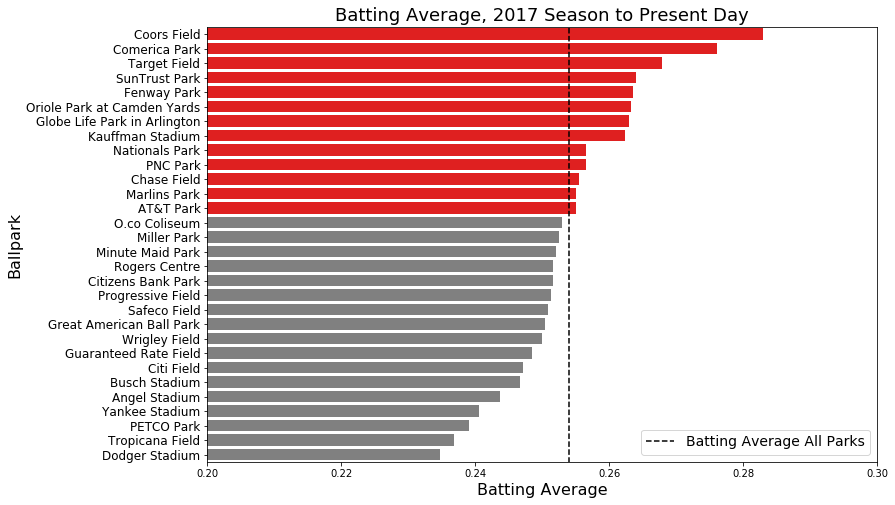

In [121]:
fig, ax1 = plt.subplots(figsize=(12,8))

clrs = ['grey' if (x < all_bat_avg) else 'red' for x in stad_merged['Avg.'] ]
g1 = sns.barplot(stad_merged['Avg.'], stad_merged['Stadium'], orient='h', palette=clrs )
g1.set_title('Batting Average, 2017 Season to Present Day', fontsize=18)
g1.set_xlabel('Batting Average', fontsize=16)
g1.set_ylabel('Ballpark', fontsize=16)
g1.set_xlim(0.20,0.30)
g1.set_yticklabels(stad_merged['Stadium'], fontsize=12)
g1.vlines(all_bat_avg, -1, 100, colors='k', linestyles='dashed', label='Batting Average All Parks')
plt.legend(fontsize=14);

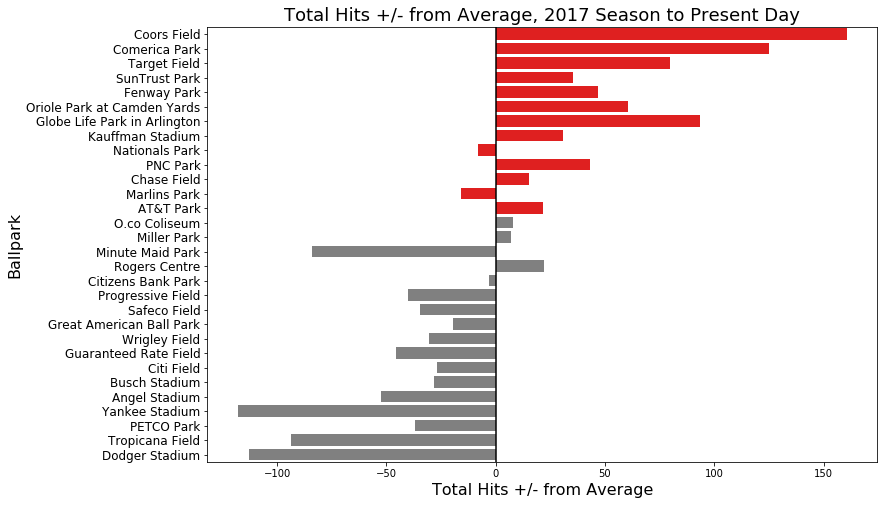

In [122]:
fig, ax1 = plt.subplots(figsize=(12,8))

clrs = ['grey' if (x < all_bat_avg) else 'red' for x in stad_merged['Avg.'] ]
g1 = sns.barplot(stad_merged['Hit_Diff'], stad_merged['Stadium'], orient='h', palette=clrs )
g1.set_title('Total Hits +/- from Average, 2017 Season to Present Day', fontsize=18)
g1.set_xlabel('Total Hits +/- from Average', fontsize=16)
g1.set_ylabel('Ballpark', fontsize=16)
g1.set_yticklabels(stad_merged['Stadium'], fontsize=12)
g1.vlines(0, -1, 100, colors='k');

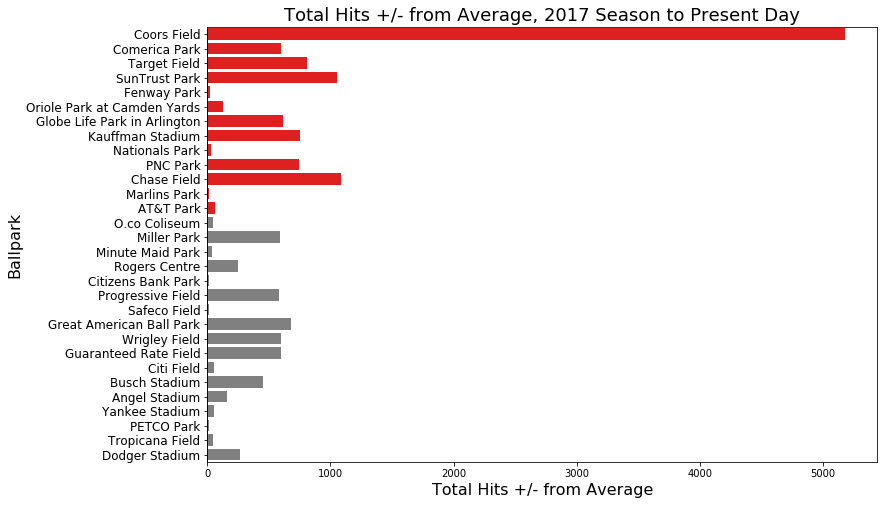

In [123]:
fig, ax1 = plt.subplots(figsize=(12,8))

clrs = ['grey' if (x < all_bat_avg) else 'red' for x in stad_merged['Avg.'] ]
g1 = sns.barplot(stad_merged['Elev'], stad_merged['Stadium'], orient='h', palette=clrs )
g1.set_title('Total Hits +/- from Average, 2017 Season to Present Day', fontsize=18)
g1.set_xlabel('Total Hits +/- from Average', fontsize=16)
g1.set_ylabel('Ballpark', fontsize=16)
g1.set_yticklabels(stad_merged['Stadium'], fontsize=12)
g1.vlines(0, -1, 100, colors='k');

In [156]:
# At First, there doesn't seem to be correlation...

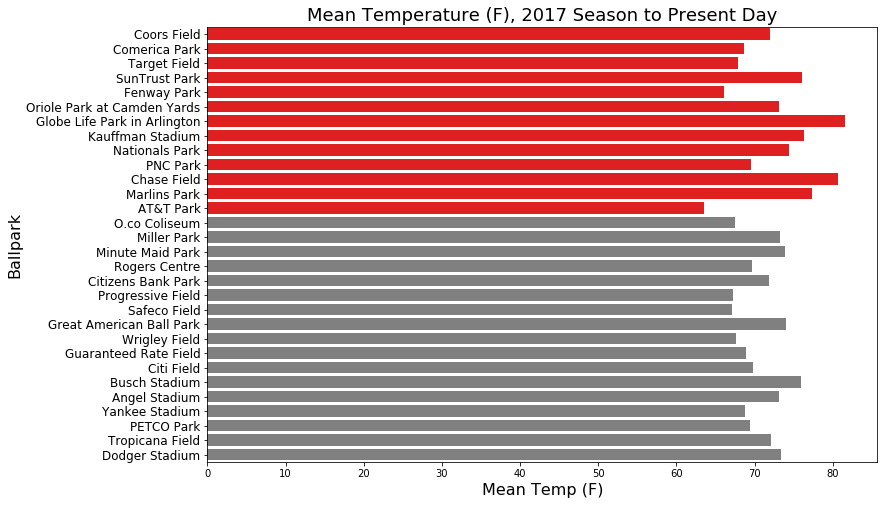

In [158]:
fig, ax1 = plt.subplots(figsize=(12,8))

clrs = ['grey' if (x < all_bat_avg) else 'red' for x in stad_merged['Avg.'] ]
g1 = sns.barplot(stad_merged['Mean_Temp'], stad_merged['Stadium'], orient='h', palette=clrs )
g1.set_title('Mean Temperature (F), 2017 Season to Present Day', fontsize=18)
g1.set_xlabel('Mean Temp (F)', fontsize=16)
g1.set_ylabel('Ballpark', fontsize=16)
g1.set_yticklabels(stad_merged['Stadium'], fontsize=12);

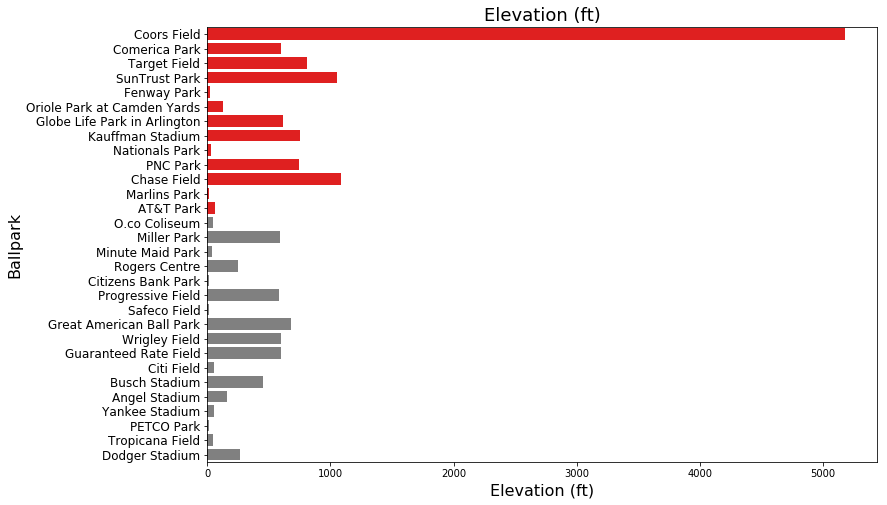

In [160]:
fig, ax1 = plt.subplots(figsize=(12,8))

clrs = ['grey' if (x < all_bat_avg) else 'red' for x in stad_merged['Avg.'] ]
g1 = sns.barplot(stad_merged['Elev'], stad_merged['Stadium'], orient='h', palette=clrs )
g1.set_title('Elevation (ft)', fontsize=18)
g1.set_xlabel('Elevation (ft)', fontsize=16)
g1.set_ylabel('Ballpark', fontsize=16)
g1.set_yticklabels(stad_merged['Stadium'], fontsize=12);

In [153]:
from sklearn.preprocessing import MinMaxScaler

In [161]:
mms = MinMaxScaler(feature_range=(0,1))
temp = mms.fit_transform(stad_merged[['Mean_Temp', 'Elev']])
interact_list = []
for i in temp:
    interact_list.append( i[0] * i[1] )
    
stad_merged['Temp/Elev_Int'] = interact_list

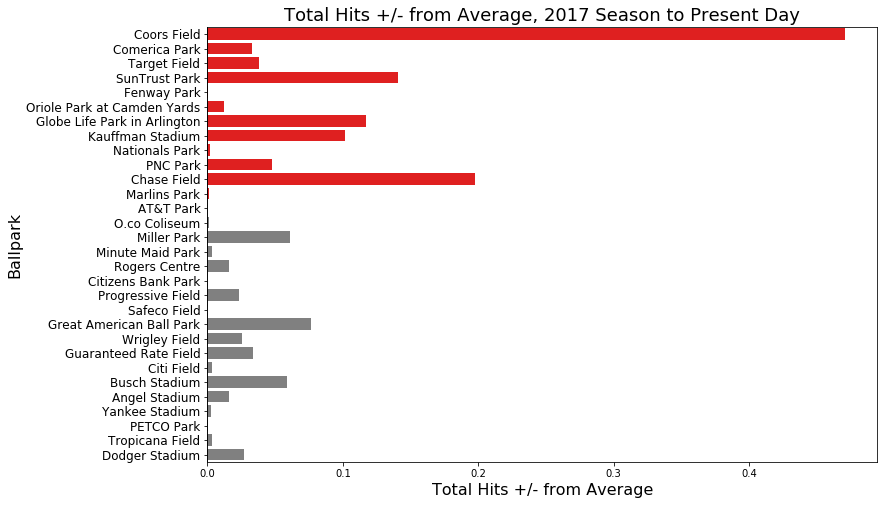

In [162]:
fig, ax1 = plt.subplots(figsize=(12,8))

clrs = ['grey' if (x < all_bat_avg) else 'red' for x in stad_merged['Avg.'] ]
g1 = sns.barplot(stad_merged['Temp/Elev_Int'], stad_merged['Stadium'], orient='h', palette=clrs )
g1.set_title('Total Hits +/- from Average, 2017 Season to Present Day', fontsize=18)
g1.set_xlabel('Total Hits +/- from Average', fontsize=16)
g1.set_ylabel('Ballpark', fontsize=16)
g1.set_yticklabels(stad_merged['Stadium'], fontsize=12)
g1.vlines(0, -1, 100, colors='k');

In [134]:
stad_merged.dtypes

Stadium       object
Avg.         float64
Mean_Temp    float64
City          object
Team          object
OF           float64
LF           float64
CF           float64
RF           float64
Abbrev        object
Elev           int64
Dist_LF        int64
Dist_CF        int64
Dist_RF        int64
Hit_Diff     float64
dtype: object

In [132]:
# Convert some datatypes that are strangely 'object' at present
stad_merged['Avg.'] = stad_merged['Avg.'].apply(lambda x: float(x))
stad_merged['Mean_Temp'] = stad_merged['Mean_Temp'].apply(lambda x: float(x))

In [138]:
stad_merged.corr()

,Avg.,Mean_Temp,OF,LF,CF,RF,Elev,Dist_LF,Dist_CF,Dist_RF,Hit_Diff
Avg.,1.000000,0.065749,0.432269,0.135477,0.426635,0.312339,0.603448,0.276231,0.552194,0.076366,0.925454
Mean_Temp,0.065749,1.000000,0.414526,0.393516,0.183397,0.227304,0.139185,0.059787,0.203184,0.322433,0.065072
OF,0.432269,0.414526,1.000000,0.738853,0.652760,0.553335,0.509199,0.470877,0.529533,0.378037,0.466742
LF,0.135477,0.393516,0.738853,1.000000,0.166440,0.188625,0.387283,0.528344,0.295174,0.469156,0.258154
CF,0.426635,0.183397,0.652760,0.166440,1.000000,0.058911,0.341236,0.087878,0.786575,0.034933,0.337057
RF,0.312339,0.227304,0.553335,0.188625,0.058911,1.000000,0.260469,0.300999,-0.137284,0.227793,0.338625
Elev,0.603448,0.139185,0.509199,0.387283,0.341236,0.260469,1.000000,0.315963,0.398491,0.426656,0.566909
Dist_LF,0.276231,0.059787,0.470877,0.528344,0.087878,0.300999,0.315963,1.000000,0.209030,0.724153,0.355107
Dist_CF,0.552194,0.203184,0.529533,0.295174,0.786575,-0.137284,0.398491,0.209030,1.000000,0.170115,0.423036
Dist_RF,0.076366,0.322433,0.378037,0.469156,0.034933,0.227793,0.426656,0.724153,0.170115,1.000000,0.064756


In [77]:
tb[tb['Home?']==1]['H'].sum() / tb[tb['Home?']==1]['AB'].sum()

0.25896975642336834

In [78]:
tb[tb['Home?']==0]['H'].sum() / tb[tb['Home?']==0]['AB'].sum()

0.24936869316990887

In [ ]:
# We'll come back to this

# Begin Rolling Stats

In [ ]:
tb_window = ['PA', 'R', 'H', '2B', '3B', 'HR', 'RBI', # batting strength
             'SO', 'GDP', 'LOB', # batting weakness
             'SB', # running strength
             'CS', # running weakness
             'Win/Loss', # overall team winningness
             'WPA', 'RE24', 'aLI' # BR Measures
            ]

tp_window = ['BF', 'R', 'H', '2B', '3B', 'ER', 'HR', 'Pit',# opponent pitching weakness
             'SO', 'WP', 'Str', 'GDP', 'Str/Pit', 'Win/Loss', # opponent pitching strength
             'WPA', 'RE24', 'aLI', # BR Measures
             '#' # May want to track average number of pitchers used
            ]

pp_window = ['IP', # May want to track deepness of starter
              'DFS(DK)', 'DFS(FD)', # May be rather informative
              'R', 'H', '2B', '3B', 'ER', 'HR', 'BB', 'BF/IP', 'WP', # opponent starting p weakness
              'SO', 'Str/Pit', 'GDP', # opponent starting p strength
              'GSc', 'WPA', 'RE24', 'aLI' # BR Measures
             ]

In [ ]:
### DO I NEED TO SET DATE TO THE INDEX BEFORE ROLLING???

## Rolling Team Batting

In [ ]:
teams = tb['Tm'].unique()

In [ ]:
rolling_cols = []
for i in tb_window:
    rolling_cols.append('ewm03_'+i+'_tmbat')
for i in tb_window:
    rolling_cols.append('ewm15_'+i+'_tmbat')
for j in tb_window:
    rolling_cols.append('rm81_'+j+'_tmbat')
    
rolling_cols.append('Tm')
rolling_cols.append('Date')

In [ ]:
rolling_cols

In [ ]:
tb_rolling = pd.DataFrame(columns = rolling_cols)

for team in teams:
    tb_team = tb[tb['Tm']==team]
    
    # Try to capture shorter term strength/weakness
    ewm03 = tb_team[tb_window].ewm(span=3, min_periods=1).mean().shift()
    ewm15 = tb_team[tb_window].ewm(span=15, min_periods=1).mean().shift()
    # 81 games covers half a season, captures typical strength/weakness
    rm81 = tb_team[tb_window].rolling(window=81, min_periods=1).mean().shift()
    
    this_df = pd.concat([ewm03, ewm15, rm81], axis=1)

    this_df['Tm'] = team
    this_df['Date'] = tb_team['Date']
    this_df.columns = rolling_cols
    
    tb_rolling = pd.concat([tb_rolling, this_df])

In [ ]:
tb_rolling.set_index(['Date', 'Tm'], drop=False, inplace=True)
tb.set_index(['Date', 'Tm'], drop=False, inplace=True)

In [ ]:
print(tb.shape)
print(tb_rolling.shape)

In [ ]:
master = tb.merge(tb_rolling, how='left', on=['Date', 'Tm'])

In [ ]:
master.shape

In [ ]:
master[master['Tm']=='ARI'][['Date', 'H', 'ewm03_H_tmbat']]

## Rolling Opposing Pitching Staff, Team Level

In [ ]:
rolling_cols = []
for i in tp_window:
    rolling_cols.append('ewm03_'+i+'_opppit')
for i in tp_window:
    rolling_cols.append('ewm15_'+i+'_opppit')
for j in tp_window:
    rolling_cols.append('rm81_'+j+'_opppit')
    
rolling_cols.append('Tm')
rolling_cols.append('Date')

In [ ]:
rolling_cols

In [ ]:
tp_rolling = pd.DataFrame(columns = rolling_cols)

for team in teams:
    tp_team = tp[tp['Tm']==team]
    
    ewm03 = tp_team[tp_window].ewm(span=3, min_periods=1).mean().shift()
    ewm15 = tp_team[tp_window].ewm(span=15, min_periods=1).mean().shift()
    rm81 = tp_team[tp_window].rolling(window=81, min_periods=1).mean().shift()
    
    this_df = pd.concat([ewm03, ewm15, rm81], axis=1)

    this_df['Tm'] = team
    this_df['Date'] = tp_team['Date']
    this_df.columns = rolling_cols
    
    tp_rolling = pd.concat([tp_rolling, this_df])

In [ ]:
tp_rolling.set_index(['Date', 'Tm'], drop=False, inplace=True)

In [ ]:
print(master.shape)
print(tp_rolling.shape)

In [ ]:
master = master.merge(tp_rolling, how='left', left_on=['Date', 'Opp'], right_on=['Date', 'Tm'])

In [ ]:
master.shape

In [ ]:
master[master['Opp']=='ARI'][['Date', 'SO', 'rm81_SO_opppit']]

## Rolling Opposing Starting Pitcher

In [ ]:
rolling_cols = []
for i in pp_window:
    rolling_cols.append('ewm03_'+i+'_plpit')
for i in pp_window:
    rolling_cols.append('ewm15_'+i+'_plpit')
for j in pp_window:
    rolling_cols.append('rm81_'+j+'_plpit')

rolling_cols.append('Player')
rolling_cols.append('Tm')
rolling_cols.append('Date')

In [ ]:
rolling_cols

In [ ]:
pitchers = pp['Player'].unique()

In [ ]:
pp[pp['Player']==pitchers[0]]

In [ ]:
pp_rolling = pd.DataFrame(columns = rolling_cols)

for pitcher in pitchers:
    pp_pitcher = pp[pp['Player']==pitcher]
    
    ewm03 = pp_pitcher[pp_window].ewm(span=3, min_periods=1).mean().shift()
    ewm15 = pp_pitcher[pp_window].ewm(span=15, min_periods=1).mean().shift()
    rm81 = pp_pitcher[pp_window].rolling(window=81, min_periods=1).mean().shift()
    
    this_df = pd.concat([ewm03, ewm15, rm81], axis=1)

    this_df['Player'] = pitcher
    this_df['Tm'] = pp_pitcher['Tm']
    this_df['Date'] = pp_pitcher['Date']
    this_df.columns = rolling_cols
    
    pp_rolling = pd.concat([pp_rolling, this_df])

In [ ]:
pp_rolling.head()

In [ ]:
pp_rolling.set_index(['Date', 'Tm'], drop=False, inplace=True)

In [ ]:
print(master.shape)
print(pp_rolling.shape)

In [ ]:
master = master.merge(pp_rolling, how='left', left_on=['Date', 'Opp'], right_on=['Date', 'Tm'])

In [ ]:
master.shape

In [ ]:
master[master.columns[28:]].head()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

## One-Hot Encode Weather Metrics 'WindDir', 'Prec', 'Sky'

In [ ]:
# Drop 'Sky' for now
master.drop('Sky', axis=1, inplace=True)

In [ ]:
# Drop remaining nulls so that CountVectorizer will work
master.dropna(inplace=True)

In [ ]:
cv = CountVectorizer()

In [ ]:
cv.fit_transform(master['Prec'])

# Modeling

In [ ]:
list(master.isnull().sum())

In [ ]:
master.dropna(inplace=True)

In [ ]:
list(master.columns)

In [ ]:
drop_cols = ['Date', 'Tm_x', 'Opp', 'Rslt', 'PA', 'AB', 'H', '2B', '3B', 'HR',
            'RBI', 'BB', 'IBB', 'SO', 'HBP', 'SH', 'SF', 'ROE', 'GDP', 'SB', 'CS', 'WPA',
            'RE24', 'aLI', 'LOB', '#', 'Attendance', 'GmLen', 'Game#', 'Win/Loss', 'Tm_y',
            'Player', 'Tm',
            'WindDir', 'Prec', 'Stad']

In [ ]:
model_df = master.drop(drop_cols, axis=1)

In [ ]:
model_df.corr()

In [ ]:
X = model_df.drop('R', axis=1)
y = model_df['R']

In [ ]:
print(X.shape)
print(y.shape)

In [ ]:
X.head()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
ss = StandardScaler()
X = ss.fit_transform(X)

In [ ]:
X

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

In [ ]:
lr.score(X_train, y_train)

In [ ]:
y_train - lr.predict(X_train)

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(y_train, lr.predict(X_train))
plt.xlim(0,5)
plt.ylim(0,5)
plt.xticks(range(0,20));

In [ ]:
y_train.describe()

In [ ]:
preds = lr.predict(X_train)
pd.Series(preds).describe()

## Modeling Win/Loss

In [ ]:
drop_cols = ['Rk', 'Date', 'Tm_x', 'Opp', 'Rslt', 'PA', 'AB', 'H', '2B', '3B', 'HR', 'R',
            'RBI', 'BB', 'IBB', 'SO', 'HBP', 'SH', 'SF', 'ROE', 'GDP', 'SB', 'CS', 'WPA',
            'RE24', 'aLI', 'LOB', '#', 'Attendance', 'GmLen', 'Game#', 'Tm_y',
            'Player', 'Tm']

In [ ]:
model_df = master.drop(drop_cols, axis=1)

In [ ]:
X = model_df.drop('Win/Loss', axis=1)
y = model_df['Win/Loss']

- Note: I want Home/Away and ADI/weather info

## tb: Team Batting
- PA: Plate Appearances
- AB: At Bats
- R: Runs
- H: Hits
- BB: Bases on Balls
- IBB: Intentional Bases on Balls 
- SO: Strikeouts
- HBP: Hit-by-pitch
- SH: Sacrifice Hits
- SF: Sacrifice Flies
- ROE: Reached on Error
- GDB: Double Plays Grounded Into
- SB: Stolen Bases
- CS: Caught Stealing
- WPA: Win Probability Added for Offensive Player (BR measure)
- RE24: Base-out Runs Added (BR measure)
- aLI: Average Leverage Index (BR measure)
- LOB: Runners Left on Base
- #: Number of Players Used in Game
- GmLen: Game Length (minutes)

## tp: Team Pitching
- ER: Earned Runs Allowed
- UER: Unearned Runs Allowed
- Pit: Number of total pitches
- Str: Number of total strikes
- IR: Number of inherited runners
- IS: Inherited Score
- BF: Batters Faced
- SB: Stolen Bases
- CS: Caught Stealing
- PO: Pickoffs
- BK: Balks
- ERA: Earned Run Average
- WPA: Win Probability added by Pitcher (BR measure)
- RE24: Base-Out Runs Saved (BR measure)
- #: Number of pitchers used in the game

## pp: Player Pitching
- AppDec: Indicates starting and ending of pitcher
- GSc: Game Score (BR Measure)
- WP: Wild Pitches